<a href="https://colab.research.google.com/github/anjanasa13/LinkedIn-review-sentiment-analysis-with-python/blob/main/Linkedin_review_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

App Reviews Sentiment Analysis is the process of examining and interpreting the sentiments conveyed in user reviews of mobile applications (apps). This analysis employs data analysis techniques to discern whether the sentiments expressed in these reviews lean towards being positive, negative, or neutral. By leveraging natural language processing and machine learning algorithms, the goal is to gain insights into the overall user sentiment, helping app developers and businesses understand how users perceive their apps. This valuable information aids in making informed decisions for app improvements, marketing strategies, and overall user satisfaction.

Let's break down each step:

1. Gather Dataset of App Reviews:

Start by collecting a dataset of app (LinkedIn)reviews from various sources. This dataset should ideally cover a diverse range of apps and user experiences.

2. Perform Exploratory Data Analysis (EDA):

Analyze the length of the reviews: Understanding the distribution of review lengths can provide insights into users' willingness to provide detailed feedback.
Analyze review ratings: Explore the distribution of ratings to identify any patterns or trends.

3. Label Sentiment Data:

Utilize tools like Textblob or NLTK to label the sentiment of each review. These tools can automatically classify reviews into positive, negative, or neutral categories based on the language used.

4. Understand Overall Sentiment Distribution:

Evaluate the distribution of sentiments in the dataset. Understanding the overall sentiment breakdown provides a high-level view of user satisfaction.

5. Explore Relationship Between Sentiments and Ratings:

Investigate how sentiments align with the given ratings. This step can reveal whether users tend to express sentiments that correspond to their numerical ratings.

6. Analyze Review Text:

Dive into the text of reviews to identify common themes or frequently used words associated with different sentiment categories. This qualitative analysis can offer more detailed insights into user opinions.



By following this systematic process, you can gain a nuanced understanding of user sentiments in app reviews. These insights can be invaluable for developers and businesses aiming to enhance their apps, address specific issues, and improve overall user satisfaction.

**To kick off the app reviews sentiment analysis task, let's begin by importing the essential Python libraries and loading the dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
from google.colab import files
uploaded = files.upload()


Saving linkedin-reviews (1).csv to linkedin-reviews (1).csv


In [5]:
# Load the dataset
linkedin_data = pd.read_csv("/content/linkedin-reviews (1).csv")

# Display the first few rows of the dataset
print(linkedin_data.head())

                                              Review  Rating
0  Does absolutely nothing for a LinkedIn beginne...       1
1                            Force close(galaxy tab)       1
2  Slow and it tries to upload your contacts with...       1
3  Add ability to customize the profile and move ...       4
4  Good app, but it's a pain that it's not possib...       4


In [6]:
print(linkedin_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB
None


**The dataset comprises two columns: "Review" and "Rating." In the "Review" column, you'll find textual feedback, while the "Rating" column holds corresponding numerical ratings.**

**Conducting Exploratory Data Analysis (EDA)**

**Now, let's delve into this dataset step by step. Our initial focus is on examining the distribution of ratings, aiming to gain insights into the overarching sentiment conveyed in the reviews. Subsequently, we can extend our exploration by analyzing factors like the length of reviews, potentially extracting additional insights from the textual content.**

**To commence, let's explore the distribution of ratings**



<ipython-input-8-1a1691cf0d4d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=linkedin_data, x='Rating', palette=colors)


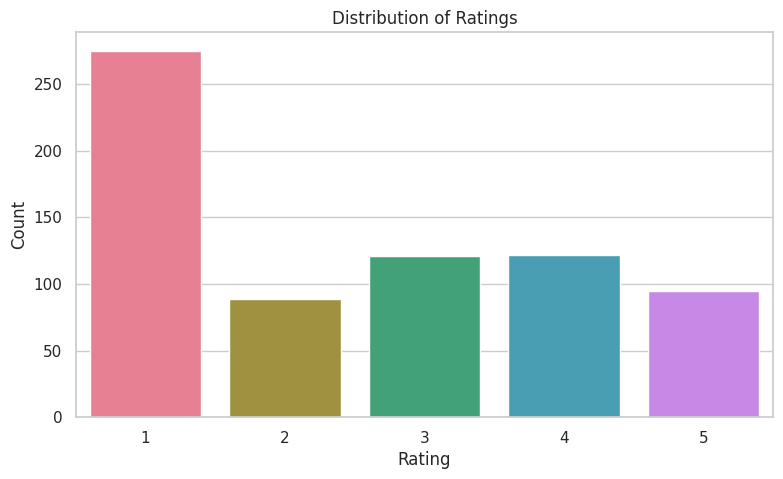

In [8]:
# Set the style
sns.set(style="whitegrid")

# Define a color palette
colors = sns.color_palette("husl", len(linkedin_data['Rating'].unique()))

# Create the plot
plt.figure(figsize=(9, 5))
sns.countplot(data=linkedin_data, x='Rating', palette=colors)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


**This is the distribution of ratings extracted from the LinkedIn reviews dataset. The visual representation offers a clear overview of the volume of reviews within each rating category, ranging from 1 to 5.**

**Majority of the people have given Linkedin a low rating of 1 which means, it has to encorporate changes into effect which will change the sentiments of the users**

**Moving forward, our analysis will shift towards exploring the length of the reviews. This exploration is motivated by the potential correlation between review length and sentiment or the level of feedback detail. The next steps involve calculating the length of each review and presenting the data in a visual format.**

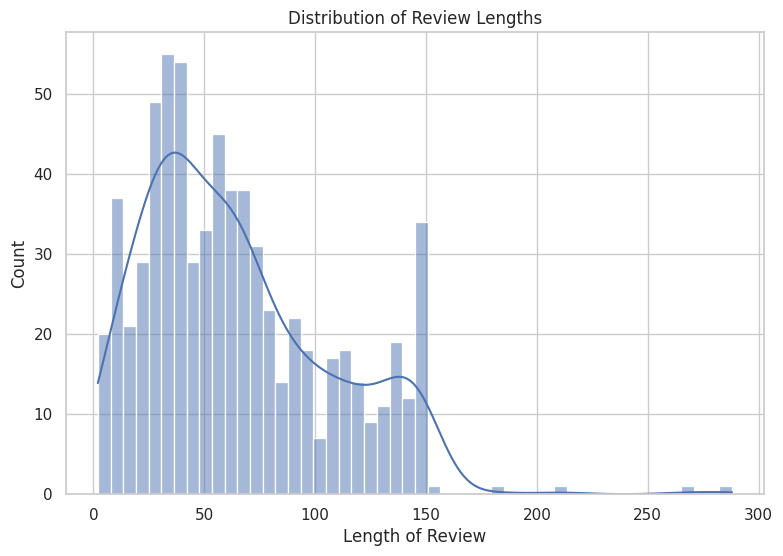

In [9]:
# Calculating the length of each review
linkedin_data['Review Length'] = linkedin_data['Review'].apply(len)

# Plotting the distribution of review lengths
plt.figure(figsize=(9, 6))
sns.histplot(linkedin_data['Review Length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.show()

A significant majority has given reviews of lengths around 50 while the number of people who have given well thought or comprehensive reviews are less than 10 in the word range of 150-300.

**SHORT REVIEWS Positive Significance:** Brief reviews could indicate that users are satisfied and found the app/service straightforward, efficient, or met their expectations. Negative Significance: On the other hand, short reviews might also suggest frustration or dissatisfaction, as users might express their dissatisfaction concisely.

**LONG REVIEWS Positive Significance: **Longer reviews may indicate a highly positive or enthusiastic experience, with users taking the time to express detailed feedback and appreciation for various aspects. Negative Significance: On the negative side, lengthy reviews could signal complex issues or numerous problems users encountered. It might also include constructive criticism or suggestions for improvement.

Now, onto the subsequent step: incorporating sentiment labels into the dataset. For this task, we'll employ **TextBlob.**

 TextBlob offers a polarity score that spans from -1 (indicating a very negative sentiment) to 1 (representing a very positive sentiment) for a given text. Utilizing this score, we can categorize each review's sentiment as positive, neutral, or negative.

In [10]:
from textblob import TextBlob

def textblob_sentiment_analysis(review):
    # Analyzing the sentiment of the review
    sentiment = TextBlob(review).sentiment
    # Classifying based on polarity
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Applying TextBlob sentiment analysis to the reviews
linkedin_data['Sentiment'] = linkedin_data['Review'].apply(textblob_sentiment_analysis)

# Displaying the first few rows with the sentiment
print(linkedin_data.head())

                                              Review  Rating  Review Length  \
0  Does absolutely nothing for a LinkedIn beginne...       1             80   
1                            Force close(galaxy tab)       1             23   
2  Slow and it tries to upload your contacts with...       1             61   
3  Add ability to customize the profile and move ...       4             90   
4  Good app, but it's a pain that it's not possib...       4            133   

  Sentiment  
0  Negative  
1   Neutral  
2  Negative  
3   Neutral  
4  Positive  


The dataset now includes sentiment labels for each review, classified as Positive, Negative, or Neutral based on the polarity score calculated by TextBlob.

<ipython-input-12-446e611b94ff>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette=colors)
<ipython-input-12-446e611b94ff>:14: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette=colors)


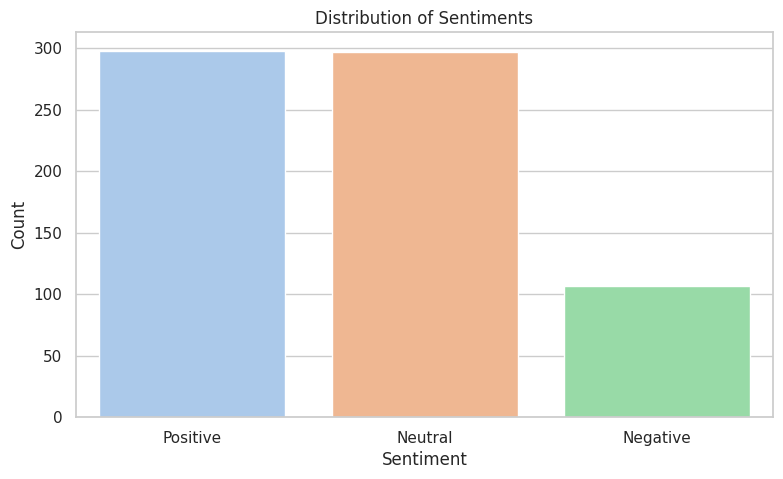

In [12]:

# Set the style
sns.set(style="whitegrid")

# Define a color palette
colors = sns.color_palette("pastel")

# Create the plot
plt.figure(figsize=(9, 5))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette=colors)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


With our dataset now labeled, it's time to delve into app reviews sentiment analysis. We'll kick off by examining the distribution of sentiments throughout the dataset. This initial analysis aims to provide a fundamental grasp of the prevalent sentiment tendencies within the reviews.

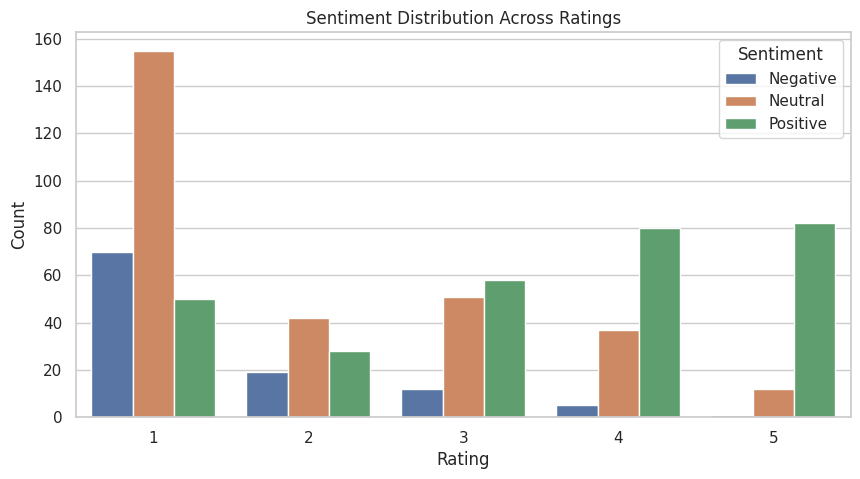

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(data=linkedin_data, x='Rating', hue='Sentiment')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

Now, let's conduct a textual analysis to recognize prevalent words or themes associated with each sentiment category. This process entails scrutinizing the most frequently used words in positive, negative, and neutral reviews through the creation of a word cloud.

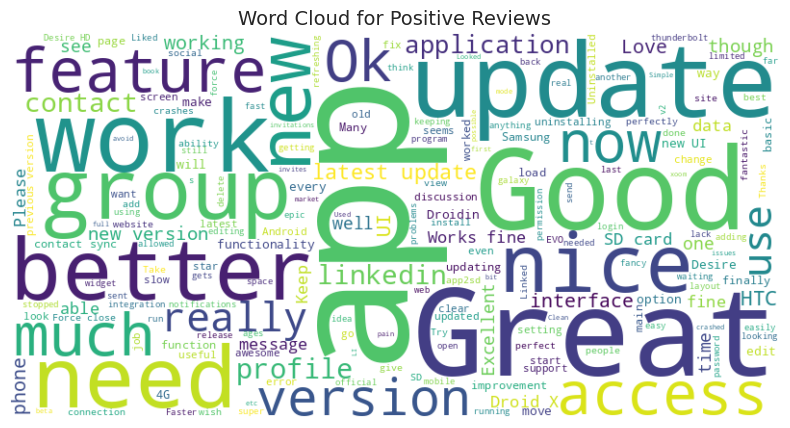

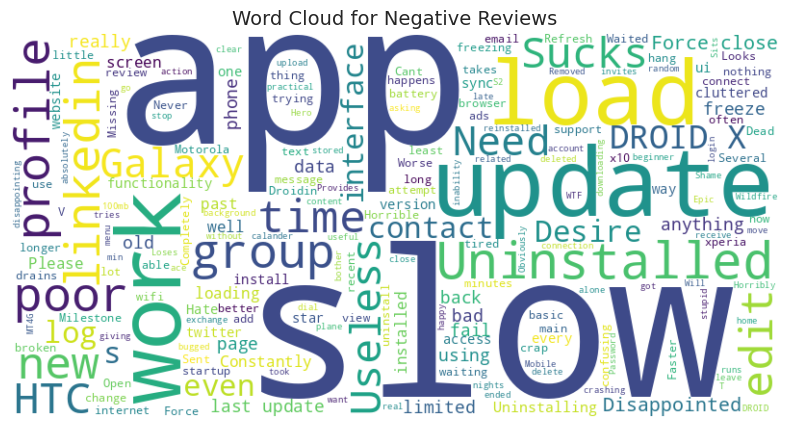

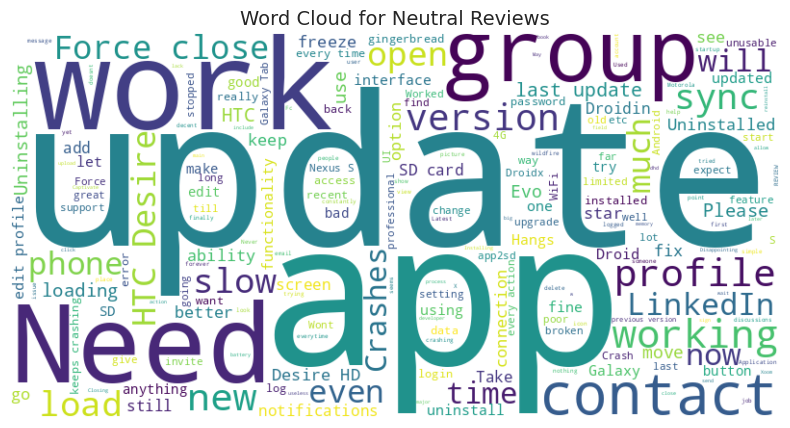

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud for each sentiment
def generate_word_cloud(sentiment):
    text = ' '.join(review for review in linkedin_data[linkedin_data['Sentiment'] == sentiment]['Review'])

    # Creating word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews', fontsize=14)
    plt.axis('off')
    plt.show()

# Generating word clouds for each sentiment
sentiments = ['Positive', 'Negative', 'Neutral']
for sentiment in sentiments:
    generate_word_cloud(sentiment)


**Summary:** from the word cloud ,UPDATE is a word that comes up as prominent in all three types. The app needs updates that will make it work faster so that the negative sentiments go down and people starts preferring to use Linkedin over other emerging alternatives


App Reviews Sentiment Analysis proves to be a valuable instrument for app developers and businesses, aiding in comprehending user feedback, prioritizing feature updates, and fostering a positive user community. This methodology encompasses the application of data analysis techniques to ascertain the sentiments expressed in these reviews, classifying them as positive, negative, or neutral.